<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Analysez les ventes d'une librairie avec R ou Python</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [1]:
# import des librairies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy import stats
from sklearn.linear_model import LinearRegression


In [2]:
#Importation des fichiers csv
customers = pd.read_csv('customers.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
transactions = pd.read_csv('transactions.csv', sep=';', low_memory=False)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier customers</h3>
</div>

In [3]:
#Affichage des infos
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
#Affichage des stats générales
customers.describe(include='all')

client_id   sex        birth
count       8621  8621  8621.000000
unique      8621     2          NaN
top       c_4410     f          NaN
freq           1  4490          NaN
mean         NaN   NaN  1978.275606
std          NaN   NaN    16.917958
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%          NaN   NaN  1992.000000
max          NaN   NaN  2004.000000

In [5]:
#calculer la somme des valeurs nulles s'il en existe
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [6]:
# Ajouter une colonne 'age' en calculant la différence entre l'année actuelle et l'année de naissance
customers['age'] = pd.to_datetime('today').year - customers['birth']

In [7]:
# Ajouter une colonne 'tranche_age' 
customers['tranche_age'] = pd.cut(customers['age'],bins=[9,19,29,39,49,59,69,79,89,99],
                               labels=['10_19', '20_29', '30_39', '40_49','50_59','60_69','70_79', '80_89', '90_99'])

In [8]:
customers.head()

client_id sex  birth  age tranche_age
0    c_4410   f   1967   57       50_59
1    c_7839   f   1975   49       40_49
2    c_1699   f   1984   40       40_49
3    c_5961   f   1962   62       60_69
4    c_5320   m   1943   81       80_89

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier products</h3>
</div>

In [9]:
#Affichage des infos
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [10]:
#Affichage des stats générales
products.describe(include='all')

id_prod        price        categ
count     3286  3286.000000  3286.000000
unique    3286          NaN          NaN
top     0_1421          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.863597     0.370359
std        NaN    29.849786     0.615446
min        NaN     0.620000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.075000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000

In [11]:
#calculer la somme des valeurs nulles s'il en existe
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [12]:
products.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier transactions</h3>
</div>


In [13]:
#Affichage des infos
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [14]:
#Affichage des stats générales
transactions.describe(include='all')

id_prod                        date session_id client_id
count   687534                      687534     687534    687534
unique    3265                      687419     345505      8600
top      1_369  2021-10-06 21:29:59.752585   s_118668    c_1609
freq      2340                           2         14     25586

In [15]:
#calculer la somme des valeurs nulles s'il en existe
transactions.isnull().sum()

id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64

In [16]:
transactions.head()

id_prod                        date session_id client_id
0  0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1  0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2  0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3  0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4  0_1358  2021-03-01 00:05:18.801198        s_5    c_2033

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointure des fichiers</h2>
</div>

In [17]:
transactions_customers = pd.merge(transactions, customers, on=['client_id'])

In [18]:
transactions_customers

id_prod                        date session_id client_id sex  birth  \
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329   f   1967   
1        1_498  2021-03-11 00:57:22.865244     s_4624     c_329   f   1967   
2       0_1140  2021-03-16 10:01:30.705174     s_7071     c_329   f   1967   
3        1_451  2021-03-18 17:26:18.887580     s_8134     c_329   f   1967   
4        1_381  2021-04-25 13:26:06.218857    s_25561     c_329   f   1967   
...        ...                         ...        ...       ...  ..    ...   
687529  0_2194  2022-03-18 23:53:54.697941   s_181130     c_177   m   1973   
687530  0_1059  2022-04-18 23:45:11.375521   s_196094     c_177   m   1973   
687531  0_2194  2022-04-18 23:53:54.697941   s_196094     c_177   m   1973   
687532  0_1059  2023-02-18 23:45:11.375521   s_343601     c_177   m   1973   
687533  0_2194  2023-02-18 23:53:54.697941   s_343601     c_177   m   1973   

        age tranche_age  
0        57       50_59  
1        57       50_59  
2        57       50_59  
3        57       50_59  
4        57       50_59  
...     ...         ...  
687529   51       50_59  
687530   51       50_59  
687531   51       50_59  
687532   51       50_59  
687533   51       50_59  

[687534 rows x 8 columns]

In [19]:
df_final0 = pd.merge(transactions_customers, products, on=['id_prod'], how='outer', indicator= True)

In [20]:
df_final0

id_prod                        date session_id client_id  sex   birth  \
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329    f  1967.0   
1       0_1259  2022-10-01 00:01:07.843138   s_275943     c_329    f  1967.0   
2       0_1259  2022-12-01 00:01:07.843138   s_305291     c_329    f  1967.0   
3       0_1259  2023-01-01 00:01:07.843138   s_320153     c_329    f  1967.0   
4       0_1259  2021-03-04 07:26:01.343183     s_1519    c_1609    m  1980.0   
...        ...                         ...        ...       ...  ...     ...   
687550  0_1624                         NaN        NaN       NaN  NaN     NaN   
687551    2_86                         NaN        NaN       NaN  NaN     NaN   
687552   0_299                         NaN        NaN       NaN  NaN     NaN   
687553   0_510                         NaN        NaN       NaN  NaN     NaN   
687554  0_2308                         NaN        NaN       NaN  NaN     NaN   

         age tranche_age   price  categ      _merge  
0       57.0       50_59   11.99      0        both  
1       57.0       50_59   11.99      0        both  
2       57.0       50_59   11.99      0        both  
3       57.0       50_59   11.99      0        both  
4       44.0       40_49   11.99      0        both  
...      ...         ...     ...    ...         ...  
687550   NaN         NaN   24.50      0  right_only  
687551   NaN         NaN  132.36      2  right_only  
687552   NaN         NaN   22.99      0  right_only  
687553   NaN         NaN   23.66      0  right_only  
687554   NaN         NaN   20.28      0  right_only  

[687555 rows x 11 columns]

In [21]:
df_final0 = pd.merge(transactions_customers, products, on=['id_prod'], how='outer', indicator= False)

In [22]:
df_final0

id_prod                        date session_id client_id  sex   birth  \
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329    f  1967.0   
1       0_1259  2022-10-01 00:01:07.843138   s_275943     c_329    f  1967.0   
2       0_1259  2022-12-01 00:01:07.843138   s_305291     c_329    f  1967.0   
3       0_1259  2023-01-01 00:01:07.843138   s_320153     c_329    f  1967.0   
4       0_1259  2021-03-04 07:26:01.343183     s_1519    c_1609    m  1980.0   
...        ...                         ...        ...       ...  ...     ...   
687550  0_1624                         NaN        NaN       NaN  NaN     NaN   
687551    2_86                         NaN        NaN       NaN  NaN     NaN   
687552   0_299                         NaN        NaN       NaN  NaN     NaN   
687553   0_510                         NaN        NaN       NaN  NaN     NaN   
687554  0_2308                         NaN        NaN       NaN  NaN     NaN   

         age tranche_age   price  categ  
0       57.0       50_59   11.99      0  
1       57.0       50_59   11.99      0  
2       57.0       50_59   11.99      0  
3       57.0       50_59   11.99      0  
4       44.0       40_49   11.99      0  
...      ...         ...     ...    ...  
687550   NaN         NaN   24.50      0  
687551   NaN         NaN  132.36      2  
687552   NaN         NaN   22.99      0  
687553   NaN         NaN   23.66      0  
687554   NaN         NaN   20.28      0  

[687555 rows x 10 columns]

In [23]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
df_final0.isna().sum()


 Données manquantes par colonne :



id_prod         0
date           21
session_id     21
client_id      21
sex            21
birth          21
age            21
tranche_age    21
price           0
categ           0
dtype: int64

In [24]:
#On affiche les 21 lignes avec des données manquantes
pd.set_option('display.max_rows', 21)
df_final0[df_final0.isna().any(axis=1)]

id_prod date session_id client_id  sex  birth  age tranche_age   price  \
687534  0_1016  NaN        NaN       NaN  NaN    NaN  NaN         NaN   35.06   
687535  0_1780  NaN        NaN       NaN  NaN    NaN  NaN         NaN    1.67   
687536  0_1062  NaN        NaN       NaN  NaN    NaN  NaN         NaN   20.08   
687537  0_1119  NaN        NaN       NaN  NaN    NaN  NaN         NaN    2.99   
687538  0_1014  NaN        NaN       NaN  NaN    NaN  NaN         NaN    1.15   
687539     1_0  NaN        NaN       NaN  NaN    NaN  NaN         NaN   31.82   
687540  0_1318  NaN        NaN       NaN  NaN    NaN  NaN         NaN   20.92   
687541  0_1800  NaN        NaN       NaN  NaN    NaN  NaN         NaN   22.05   
687542  0_1645  NaN        NaN       NaN  NaN    NaN  NaN         NaN    2.99   
687543   0_322  NaN        NaN       NaN  NaN    NaN  NaN         NaN    2.99   
687544  0_1620  NaN        NaN       NaN  NaN    NaN  NaN         NaN    0.80   
687545  0_1025  NaN        NaN       NaN  NaN    NaN  NaN         NaN   24.99   
687546    2_87  NaN        NaN       NaN  NaN    NaN  NaN         NaN  220.99   
687547   1_394  NaN        NaN       NaN  NaN    NaN  NaN         NaN   39.73   
687548    2_72  NaN        NaN       NaN  NaN    NaN  NaN         NaN  141.32   
687549   0_310  NaN        NaN       NaN  NaN    NaN  NaN         NaN    1.94   
687550  0_1624  NaN        NaN       NaN  NaN    NaN  NaN         NaN   24.50   
687551    2_86  NaN        NaN       NaN  NaN    NaN  NaN         NaN  132.36   
687552   0_299  NaN        NaN       NaN  NaN    NaN  NaN         NaN   22.99   
687553   0_510  NaN        NaN       NaN  NaN    NaN  NaN         NaN   23.66   
687554  0_2308  NaN        NaN       NaN  NaN    NaN  NaN         NaN   20.28   

        categ  
687534      0  
687535      0  
687536      0  
687537      0  
687538      0  
687539      1  
687540      0  
687541      0  
687542      0  
687543      0  
687544      0  
687545      0  
687546      2  
687547      1  
687548      2  
687549      0  
687550      0  
687551      2  
687552      0  
687553      0  
687554      0

In [25]:
#df_cleaned = df_final.dropna(subset=['date', 'session_id', 'client_id', 'sex', 'birth', 'age', 'tranche_age'])
# Nombre de lignes avant le nettoyage
initial_rows = df_final0.shape[0]

# Nettoyage du DataFrame
df_cleaned = df_final0.dropna(subset=['date', 'session_id', 'client_id', 'sex', 'birth', 'age', 'tranche_age'])

# Nombre de lignes après le nettoyage
final_rows = df_cleaned.shape[0]

# Calcul du nombre de lignes supprimées
rows_dropped = initial_rows - final_rows

print(f"Nombre de lignes supprimées : {rows_dropped}")
df_final=df_cleaned

Nombre de lignes supprimées : 21


In [26]:
df_final

id_prod                        date session_id client_id sex   birth  \
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329   f  1967.0   
1       0_1259  2022-10-01 00:01:07.843138   s_275943     c_329   f  1967.0   
2       0_1259  2022-12-01 00:01:07.843138   s_305291     c_329   f  1967.0   
3       0_1259  2023-01-01 00:01:07.843138   s_320153     c_329   f  1967.0   
4       0_1259  2021-03-04 07:26:01.343183     s_1519    c_1609   m  1980.0   
...        ...                         ...        ...       ...  ..     ...   
687529    2_81  2022-02-19 14:51:58.078656   s_167662    c_7616   m  1993.0   
687530   0_807  2021-07-24 17:43:23.555852    s_66634    c_8273   m  1991.0   
687531   1_408  2021-09-26 06:52:02.225335    s_95708    c_7402   m  1945.0   
687532   1_408  2022-11-26 06:52:02.225335   s_302962    c_7402   m  1945.0   
687533   1_408  2023-01-26 06:52:02.225335   s_332548    c_7402   m  1945.0   

         age tranche_age  price  categ  
0       57.0       50_59  11.99      0  
1       57.0       50_59  11.99      0  
2       57.0       50_59  11.99      0  
3       57.0       50_59  11.99      0  
4       44.0       40_49  11.99      0  
...      ...         ...    ...    ...  
687529  31.0       30_39  86.99      2  
687530  33.0       30_39   1.99      0  
687531  79.0       70_79  35.24      1  
687532  79.0       70_79  35.24      1  
687533  79.0       70_79  35.24      1  

[687534 rows x 10 columns]

In [27]:
df_final['year'] = pd.to_datetime(df_final['date']).dt.strftime('%Y')
df_final['Year_Month'] = pd.to_datetime(df_final['date']).dt.strftime('%Y-%m')

C:\Users\User\AppData\Local\Temp\ipykernel_38872\3098167315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year'] = pd.to_datetime(df_final['date']).dt.strftime('%Y')
C:\Users\User\AppData\Local\Temp\ipykernel_38872\3098167315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Year_Month'] = pd.to_datetime(df_final['date']).dt.strftime('%Y-%m')


In [28]:
# le panier moyen (somme des ventes/frequence d'achats).

#Ajour d'une colonne des frequences d'achats en prévision 
df_final['frequences_achats'] =1

# création de la colonne "panier moyen"
df_final['panier_moyen']= df_final['price']/df_final['frequences_achats']

C:\Users\User\AppData\Local\Temp\ipykernel_38872\1797937697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['frequences_achats'] =1
C:\Users\User\AppData\Local\Temp\ipykernel_38872\1797937697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['panier_moyen']= df_final['price']/df_final['frequences_achats']


In [29]:
df_final

id_prod                        date session_id client_id sex   birth  \
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329   f  1967.0   
1       0_1259  2022-10-01 00:01:07.843138   s_275943     c_329   f  1967.0   
2       0_1259  2022-12-01 00:01:07.843138   s_305291     c_329   f  1967.0   
3       0_1259  2023-01-01 00:01:07.843138   s_320153     c_329   f  1967.0   
4       0_1259  2021-03-04 07:26:01.343183     s_1519    c_1609   m  1980.0   
...        ...                         ...        ...       ...  ..     ...   
687529    2_81  2022-02-19 14:51:58.078656   s_167662    c_7616   m  1993.0   
687530   0_807  2021-07-24 17:43:23.555852    s_66634    c_8273   m  1991.0   
687531   1_408  2021-09-26 06:52:02.225335    s_95708    c_7402   m  1945.0   
687532   1_408  2022-11-26 06:52:02.225335   s_302962    c_7402   m  1945.0   
687533   1_408  2023-01-26 06:52:02.225335   s_332548    c_7402   m  1945.0   

         age tranche_age  price  categ  year Year_Month  frequences_achats  \
0       57.0       50_59  11.99      0  2021    2021-03                  1   
1       57.0       50_59  11.99      0  2022    2022-10                  1   
2       57.0       50_59  11.99      0  2022    2022-12                  1   
3       57.0       50_59  11.99      0  2023    2023-01                  1   
4       44.0       40_49  11.99      0  2021    2021-03                  1   
...      ...         ...    ...    ...   ...        ...                ...   
687529  31.0       30_39  86.99      2  2022    2022-02                  1   
687530  33.0       30_39   1.99      0  2021    2021-07                  1   
687531  79.0       70_79  35.24      1  2021    2021-09                  1   
687532  79.0       70_79  35.24      1  2022    2022-11                  1   
687533  79.0       70_79  35.24      1  2023    2023-01                  1   

        panier_moyen  
0              11.99  
1              11.99  
2              11.99  
3              11.99  
4              11.99  
...              ...  
687529         86.99  
687530          1.99  
687531         35.24  
687532         35.24  
687533         35.24  

[687534 rows x 14 columns]

In [30]:
#On verifie si il y a des doublons
df_final[df_final.duplicated()]

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, sex, birth, age, tranche_age, price, categ, year, Year_Month, frequences_achats, panier_moyen]
Index: []

In [31]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
df_final.isna().sum()


 Données manquantes par colonne :



id_prod              0
date                 0
session_id           0
client_id            0
sex                  0
birth                0
age                  0
tranche_age          0
price                0
categ                0
year                 0
Year_Month           0
frequences_achats    0
panier_moyen         0
dtype: int64

In [32]:
#Affichage des 21 lignes avec des données manquantes
pd.set_option('display.max_rows', 21)
df_final[df_final.isna().any(axis=1)]

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, sex, birth, age, tranche_age, price, categ, year, Year_Month, frequences_achats, panier_moyen]
Index: []

In [33]:
#Verification des références présentes dans produits et pas dans transactions.
Prod_isole_produits = products[~products['id_prod'].isin(transactions['id_prod'])]

In [34]:
Prod_isole_produits.head(21)

id_prod   price  categ
184   0_1016   35.06      0
279   0_1780    1.67      0
736   0_1062   20.08      0
793   0_1119    2.99      0
810   0_1014    1.15      0
845      1_0   31.82      1
1030  0_1318   20.92      0
1138  0_1800   22.05      0
1346  0_1645    2.99      0
1504   0_322    2.99      0
1529  0_1620    0.80      0
1542  0_1025   24.99      0
1708    2_87  220.99      2
1862   1_394   39.73      1
1945    2_72  141.32      2
2214   0_310    1.94      0
2407  0_1624   24.50      0
2524    2_86  132.36      2
2689   0_299   22.99      0
3030   0_510   23.66      0
3095  0_2308   20.28      0

Les 21 produits reférencés dans le dataframe products que ne se trouvent pas dans le fichier transactions, c'est des produits qui n'ont pas été vendus.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Les analyses</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Chiffre d’affaires avec la moyenne mobile (choisir la période : jour, semaine, mois, etc.)</h3>
</div>

In [35]:
# Calculer le chiffre d'affaires quotidien
df_final['date'] = pd.to_datetime(df_final['date'])

# Grouper par la date pour obtenir le chiffre d'affaires quotidien (ou par autre période)
df_final_daily_revenue = df_final.groupby(df_final['date'].dt.date)['price'].sum().reset_index(name='chiffre_affaires')

C:\Users\User\AppData\Local\Temp\ipykernel_38872\2994620003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['date'] = pd.to_datetime(df_final['date'])


In [36]:
# Appliquer la moyenne mobile

# calculer sur une période sur 30 jours (mois)
df_final_daily_revenue['moyenne_mobile_30j'] = df_final_daily_revenue['chiffre_affaires'].rolling(window=30).mean()

In [37]:
# Afficher les résultats
df_final_daily_revenue.head(20)

date  chiffre_affaires  moyenne_mobile_30j
0   2021-03-01          16565.22                 NaN
1   2021-03-02          15486.45                 NaN
2   2021-03-03          15198.69                 NaN
3   2021-03-04          15196.07                 NaN
4   2021-03-05          17471.37                 NaN
5   2021-03-06          15785.28                 NaN
6   2021-03-07          14760.20                 NaN
7   2021-03-08          15679.53                 NaN
8   2021-03-09          15710.51                 NaN
9   2021-03-10          15496.87                 NaN
10  2021-03-11          14801.14                 NaN
11  2021-03-12          14448.58                 NaN
12  2021-03-13          14324.84                 NaN
13  2021-03-14          15231.77                 NaN
14  2021-03-15          16141.66                 NaN
15  2021-03-16          15971.74                 NaN
16  2021-03-17          16025.47                 NaN
17  2021-03-18          15060.79                 NaN
18  2021-03-19          15545.77                 NaN
19  2021-03-20          15853.99                 NaN

In [38]:
# Filtrer les données pour avril 2021
df_final_daily_revenue['date'] = pd.to_datetime(df_final_daily_revenue['date'])

df_avril_2021 = df_final_daily_revenue.loc[(df_final_daily_revenue['date'] >= '2021-04-01') & (df_final_daily_revenue['date'] < '2021-04-30')]
# Calculer la moyenne du chiffre d'affaires pour avril 2021
moyenne_avril_2021 = df_avril_2021['chiffre_affaires'].mean()

# Afficher la moyenne
print(f"La moyenne du chiffre d'affaires pour janvier 2004 est : {moyenne_avril_2021:.2f}")

La moyenne du chiffre d'affaires pour janvier 2004 est : 15862.35


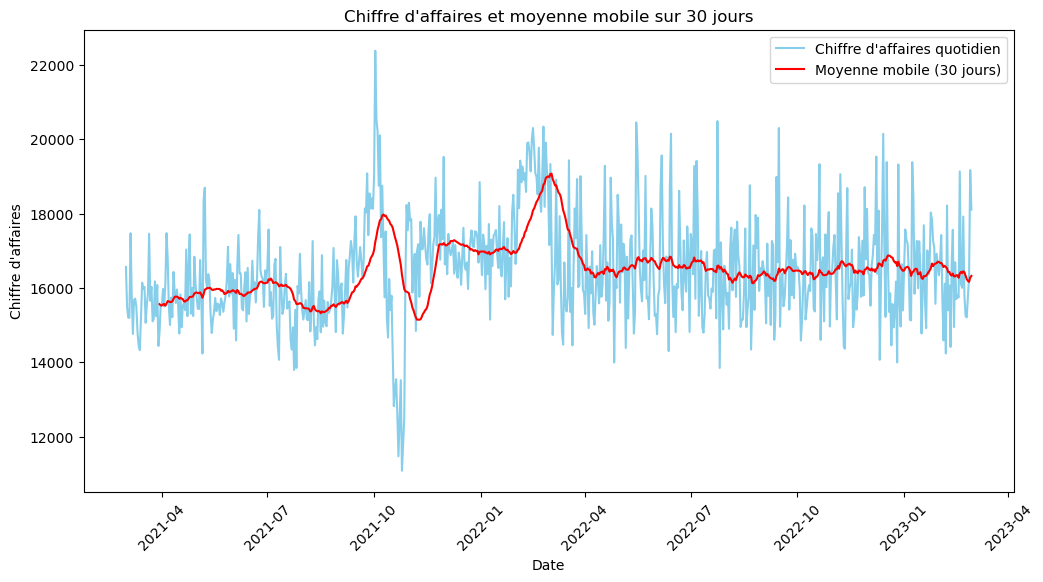

In [39]:
# Tracer le chiffre d'affaires quotidien
plt.figure(figsize=(12, 6))
plt.plot(df_final_daily_revenue['date'], df_final_daily_revenue['chiffre_affaires'], label='Chiffre d\'affaires quotidien', color='skyblue')

# Tracer la moyenne mobile sur 30 jours
plt.plot(df_final_daily_revenue['date'], df_final_daily_revenue['moyenne_mobile_30j'], label='Moyenne mobile (30 jours)', color='red')

# Ajouter des labels et un titre
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires et moyenne mobile sur 30 jours')
plt.legend()

# Rotation des labels de l'axe des x pour meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

Le graphique montre des périodes de pics suivis de phases de stabilisation. Il pourrait être intéressant d'analyser les causes de ces pics.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Chiffre d’affaires par catégorie</h3>
</div>

In [40]:
#Chiffre d’affaires par catégorie
chiffre_affaires_par_categ = df_final.groupby('categ')['price'].sum().reset_index(name='chiffre_affaires')

# Afficher le résultat
chiffre_affaires_par_categ

categ  chiffre_affaires
0      0        4419730.97
1      1        4827657.11
2      2        2780275.02

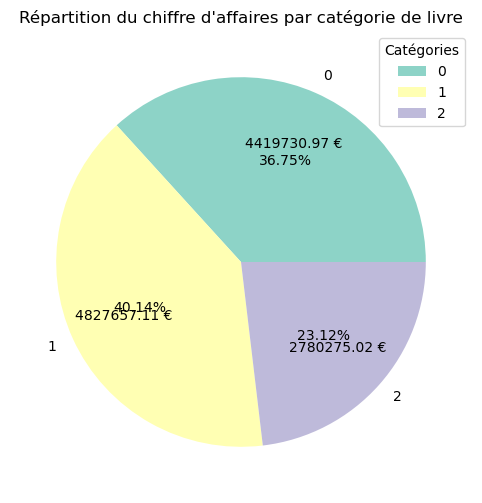

In [41]:
# Supposons que vos données soient stockées dans un DataFrame
data = df_final.pivot_table(index='categ', aggfunc={'price': np.sum})

# Création du graphique en secteurs
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(data['price'], labels=data.index, autopct='%1.2f%%', colors=plt.cm.Set3.colors)

# Ajouter des étiquettes pour chaque secteur avec les valeurs
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.7 * np.cos(np.radians(angle))
    y = wedge.r * 0.7 * np.sin(np.radians(angle))
    ax.text(x, y, f"{data['price'].iloc[i]:.2f} €", ha='center', va='center', fontsize=10, color='black')

# Titre et étiquettes
plt.title("Répartition du chiffre d'affaires par catégorie de livre")
plt.ylabel("")  # Enlève le nom de l'axe des ordonnées car il n'est pas nécessaire pour un graphique en secteurs
plt.legend(title="Catégories", loc="best")  # Change le titre de la légende
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Nombre de clients par mois</h3>
</div>

In [42]:
# Calculer le nombre de clients uniques par mois
clients_par_mois = df_final.groupby('Year_Month')['client_id'].nunique().reset_index(name='nombre_clients')

# Afficher le résultat
clients_par_mois

Year_Month  nombre_clients
0     2021-03            5676
1     2021-04            5674
2     2021-05            5644
3     2021-06            5659
4     2021-07            5672
..        ...             ...
19    2022-10            5755
20    2022-11            5749
21    2022-12            5765
22    2023-01            5828
23    2023-02            5587

[24 rows x 2 columns]

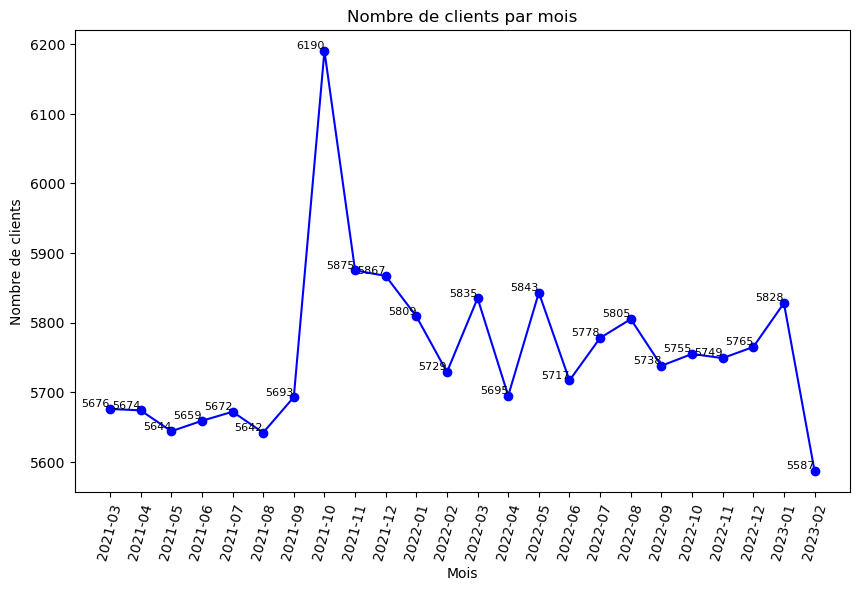

In [43]:
# Tracer le nombre de clients par mois
plt.figure(figsize=(10,6))
plt.plot(clients_par_mois['Year_Month'].astype(str), clients_par_mois['nombre_clients'], marker='o', linestyle='-', color='b')

# Ajouter des étiquettes pour chaque point de données
for i in range(len(clients_par_mois)):
    plt.text(clients_par_mois['Year_Month'].astype(str)[i], clients_par_mois['nombre_clients'][i], 
             str(clients_par_mois['nombre_clients'][i]), fontsize=8, ha='right', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients par mois')

# Rotation des labels de l'axe des x pour meilleure lisibilité
plt.xticks(rotation=75)

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
Nombre de transactions</h3>
</div>

In [44]:
# Nombre total de transactions
nombre_transactions_total = len(df_final)

print(f"Nombre total de transactions : {nombre_transactions_total}")

Nombre total de transactions : 687534


In [45]:
# Calculer le nombre de transactions par mois
transactions_par_mois = df_final.groupby('Year_Month').size().reset_index(name='nombre_transactions')

# Afficher le résultat
transactions_par_mois

Year_Month  nombre_transactions
0     2021-03                28601
1     2021-04                28443
2     2021-05                28285
3     2021-06                26850
4     2021-07                24738
..        ...                  ...
19    2022-10                28964
20    2022-11                28563
21    2022-12                28619
22    2023-01                28938
23    2023-02                25545

[24 rows x 2 columns]

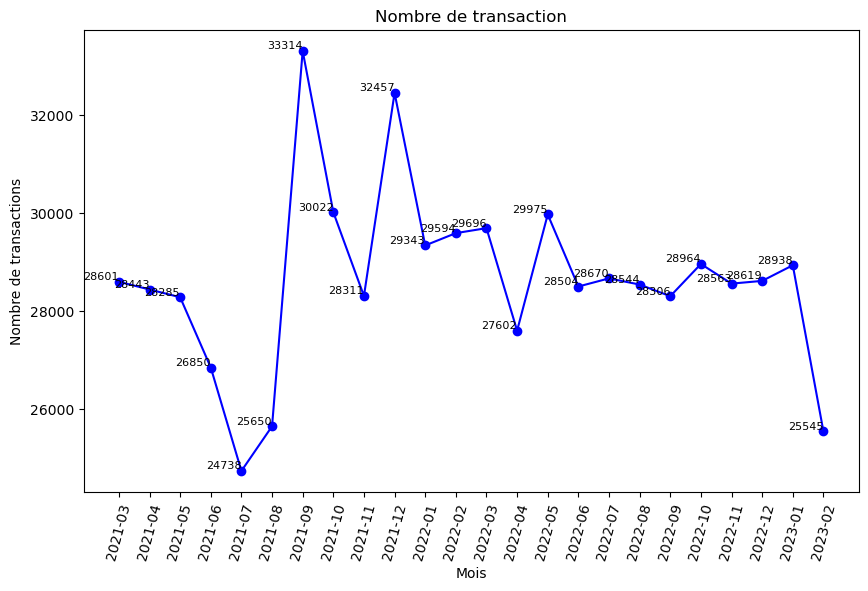

In [46]:
# Tracer le nombre de transactions
plt.figure(figsize=(10,6))
plt.plot(transactions_par_mois['Year_Month'].astype(str), transactions_par_mois['nombre_transactions'], marker='o', linestyle='-', color='b')

# Ajouter des étiquettes pour chaque point de données
for i in range(len(clients_par_mois)):
    plt.text(transactions_par_mois['Year_Month'].astype(str)[i], transactions_par_mois['nombre_transactions'][i], 
             str(transactions_par_mois['nombre_transactions'][i]), fontsize=8, ha='right', va='bottom')
    
# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transaction')

# Rotation des labels de l'axe des transactions x pour meilleure lisibilité
plt.xticks(rotation=75)

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">La répartition des ventes par catégorie</h3>
</div>

In [47]:
# Calculer le nombre de produits vendus par catégorie
produits_par_categ = df_final.groupby('categ').size().reset_index(name='nombre_produits_vendus')

# Afficher le résultat
produits_par_categ

categ  nombre_produits_vendus
0      0                  415459
1      1                  235592
2      2                   36483

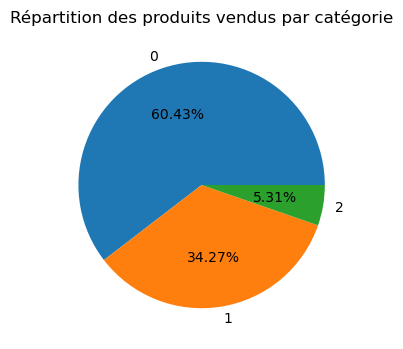

In [48]:
# Créer un graphique circulaire (camembert)

plt.figure(figsize=(4,4))
plt.pie(produits_par_categ['nombre_produits_vendus'], 
        labels=produits_par_categ['categ'], 
        autopct='%1.2f%%')

# Ajouter des étiquettes pour chaque secteur avec les valeurs
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.7 * np.cos(np.radians(angle))
    y = wedge.r * 0.7 * np.sin(np.radians(angle))
    ax.text(x, y, f"{produits_par_categ['nombre_produits_vendus'].iloc[i]:.2f} €", ha='center', va='center', fontsize=10, color='black')
        
# Ajouter un titre
plt.title('Répartition des produits vendus par catégorie')

# Afficher le graphique
plt.show()

La majorité des ventes provient de la catégorie 0, suivie par la catégorie 1, tandis que la catégorie 2 a une contribution marginale

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Nombre de produits vendus</h3>
</div>

In [49]:
# Calculer le nombre de produits vendus par produit (id_prod)
produits_par_id = df_final.groupby('id_prod').size().reset_index(name='nombre_produits_vendus')

# Afficher le résultat
produits_par_id

id_prod  nombre_produits_vendus
0        0_0                    1242
1        0_1                     487
2       0_10                      22
3      0_100                       3
4     0_1000                     432
...      ...                     ...
3260    2_95                       4
3261    2_96                     598
3262    2_97                      13
3263    2_98                       1
3264    2_99                       7

[3265 rows x 2 columns]

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Répartition des prix par catégorie de produits</h3>
</div>

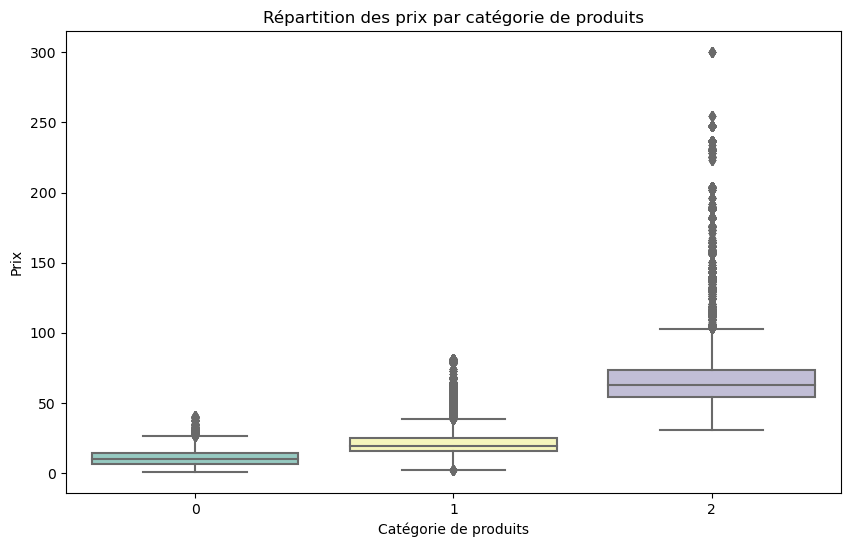

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='categ', y='price', palette="Set3")
    
plt.xlabel("Catégorie de produits")
plt.ylabel("Prix")
plt.title("Répartition des prix par catégorie de produits")
plt.show()

Le graphique montre une grande disparité dans les prix entre les catégories, avec des produits beaucoup plus chers dans la catégorie 2. Les outliers suggèrent qu’il existe des produits exceptionnels dans chaque catégorie avec des prix plus élevés que la majorité des autres produits.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Les tops</h3>
</div>

In [51]:
# Trier les produits par nombre de ventes en ordre décroissant (tops)
produits_tops = produits_par_id.sort_values(by='nombre_produits_vendus', ascending=False)

# Afficher les 5 produits les plus vendus
print("Tops (produits les plus vendus) :")
produits_tops.head(10)

Tops (produits les plus vendus) :


id_prod  nombre_produits_vendus
2591   1_369                    2340
2644   1_417                    2269
2641   1_414                    2246
2733   1_498                    2202
2653   1_425                    2163
2629   1_403                    2040
2640   1_413                    2036
2639   1_412                    2014
2632   1_406                    2003
2633   1_407                    2001

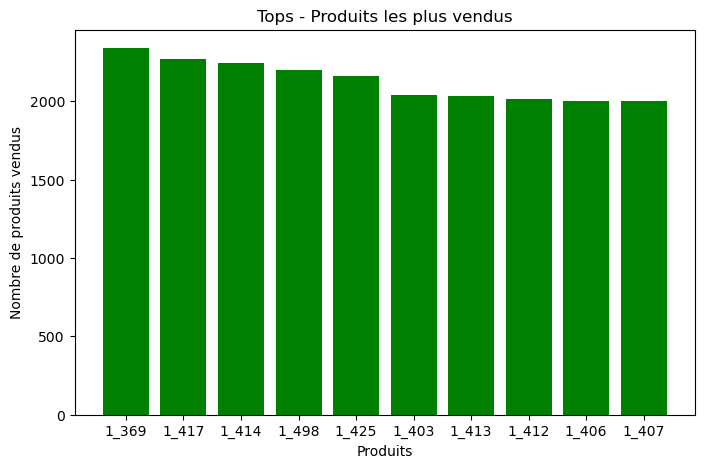

In [52]:
# Sélectionner les 10 produits les plus vendus
tops = produits_tops.head(10)

# Créer un graphique en barres pour les tops
plt.figure(figsize=(8,5))
plt.bar(tops['id_prod'], tops['nombre_produits_vendus'], color='green')
plt.xlabel('Produits')
plt.ylabel('Nombre de produits vendus')
plt.title('Tops - Produits les plus vendus')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Les flops</h3>
</div>

In [53]:
# Trier les produits par nombre de ventes en ordre décroissant (tops)
produits_flops = produits_par_id.sort_values(by='nombre_produits_vendus', ascending=True)

# Afficher les 5 produits les plus vendus
print("Flops (produits les moins vendus) :")
produits_flops.head(20)

Flops (produits les moins vendus) :


id_prod  nombre_produits_vendus
1327  0_2201                       1
802   0_1728                       1
2108   0_833                       1
2079   0_807                       1
595   0_1539                       1
698   0_1633                       1
166   0_1151                       1
752   0_1683                       1
549   0_1498                       1
3263    2_98                       1
3247    2_81                       1
417   0_1379                       1
665   0_1601                       1
3175    2_23                       1
1792   0_549                       1
1784   0_541                       1
313   0_1284                       1
2166   0_886                       1
743   0_1675                       2
719   0_1653                       2

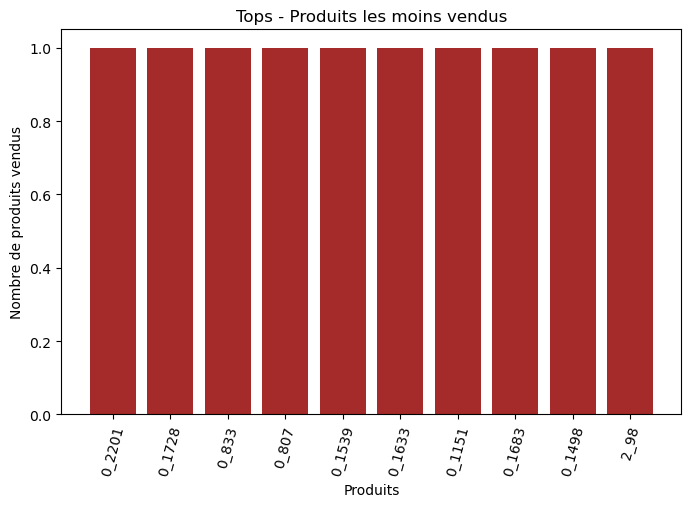

In [54]:
# Sélectionner les 10 produits les moins vendus
tops = produits_flops.head(10)

# Créer un graphique en barres pour les flops
plt.figure(figsize=(8,5))
plt.bar(tops['id_prod'], tops['nombre_produits_vendus'], color='brown')
plt.xlabel('Produits')
plt.ylabel('Nombre de produits vendus')
plt.title('Tops - Produits les moins vendus')
# Rotation des labels de l'axe des x pour meilleure lisibilité
plt.xticks(rotation=75)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,50,250); ">Répartition du chiffre d affaires pour les clients BtoB</h3>
</div>

In [55]:
# Top 10 clients

df_mean_buy_client = df_final.loc[:,['client_id', 'price']].groupby('client_id').agg(total_achats = ('price', sum)).reset_index()
df_mean_buy_client_sorted = df_mean_buy_client.sort_values(by='total_achats', ascending=False)

df_mean_buy_client_sorted.head(10)

client_id  total_achats
677     c_1609     326039.89
4388    c_4958     290227.03
6337    c_6714     153918.60
2724    c_3454     114110.57
634     c_1570       5285.82
2513    c_3263       5276.87
1268    c_2140       5260.18
2108    c_2899       5214.05
7006    c_7319       5155.77
7715    c_7959       5135.75

Étant donné le chiffre d'affaires élevé des quatre premiers clients, on suppose qu'il s'agit de clients B2B.

In [56]:
# Calcule du chiffre d'affaires total de tous les clients
chiffre_affaires_total = df_mean_buy_client_sorted['total_achats'].sum()

# Extraire les chiffres d'affaires des 4 meilleurs clients
top_4_clients = df_mean_buy_client_sorted.head(4)['total_achats'].sum()

# Calcule la répartition des 4 meilleurs clients par rapport au total
repartition_top_4 = (top_4_clients / chiffre_affaires_total) * 100

# Afficher le résultat
print(f"La répartition des 4 meilleurs clients représente : {repartition_top_4:.2f}% du chiffre d'affaires total.")

La répartition des 4 meilleurs clients représente : 7.35% du chiffre d'affaires total.


<div style="border: 0px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0); ">Suppression des clients BtoB</h3>
</div

In [57]:
# Liste des identifiants des clients à supprimer
clients_a_supprimer = ["c_1609", "c_4958", "c_6714", "c_3454"]

# Suppression des lignes correspondant aux clients spécifiés
df_final = df_final[~df_final["client_id"].isin(clients_a_supprimer)]

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Courbe de Lorenz</h3>
</div

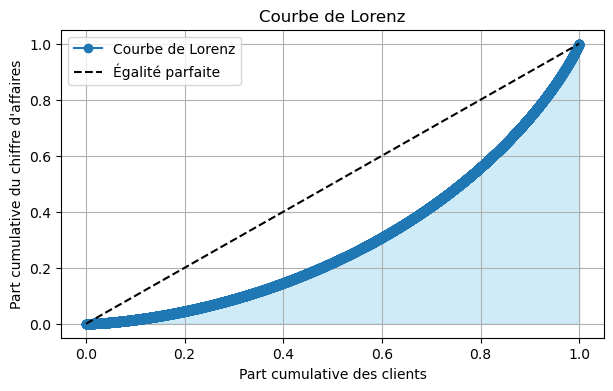

Indice de Gini : 0.398


In [58]:
# courbe de lorenz avec que les clients totals
df_lorenz = df_final.sort_values(by='price', ascending=True)
df_grouped = df_lorenz.groupby('client_id')['price'].sum().sort_values()

# Calculer les proportions cumulées
cumulative_population = df_grouped.index.to_series().reset_index(drop=True).reset_index()
cumulative_population['cumulative_population'] = (cumulative_population['index'] + 1) / cumulative_population['index'].max()

cumulative_revenue = df_grouped.cumsum() / df_grouped.sum()
n = len(cumulative_population)
# Tracer la courbe de Lorenz
plt.figure(figsize=(7, 4))
plt.plot(cumulative_population['cumulative_population'], cumulative_revenue, marker='o', label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], 'k--', label='Égalité parfaite')
plt.fill_between(cumulative_population['cumulative_population'], cumulative_revenue, color='skyblue', alpha=0.4)
plt.xlabel('Part cumulative des clients')
plt.ylabel('Part cumulative du chiffre d\'affaires')
plt.title('Courbe de Lorenz')
plt.legend()
plt.grid(True)
plt.show()

# Calcul de l'indice de Gini
AUC = (cumulative_revenue.sum() -cumulative_revenue[-1]/2 -cumulative_revenue[0]/2)/n 

# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, 
#on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

print(f'Indice de Gini : {gini:.3f}')

La courbe de Lorenz nous montre ici une distribution inégalitaire du chiffre d'affaires parmi la population (ou les clients).
Si on voulait mesurer précisément cette inégalité, on pourrait utiliser l'indice de Gini, qui correspond à la surface entre la courbe de Lorenz et la ligne d'égalité parfaite.

l'indice 0.398 montre qu'une partie significative des revenus provient d'un groupe de clients, et non d'une répartition uniforme sur l'ensemble des clients. Cela peut être un signe que l'entreprise dépend fortement de ses meilleurs clients pour réaliser son chiffre d'affaires.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Les corrélations</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1-Le lien entre le genre d’un client et les catégories des livres achetés</h3>
</div

In [59]:
# table de contingence à partir des colonnes sex et categ
cont = pd.crosstab(df_final['sex'],df_final['categ'])
cont

categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868

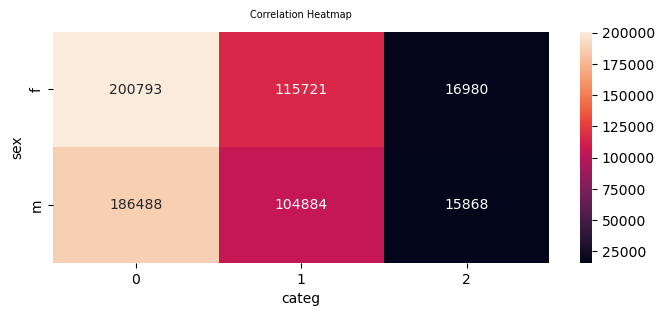

In [60]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.heatmap(cont, annot=True, fmt='.0f') 
ax.set_title('Correlation Heatmap', fontdict={'fontsize':7}, pad=10)
plt.show()

Les catégories 0 et 1 sont les plus populaires, avec une répartition équilibrée entre les sexes, ce qui indique que ces produits intéressent à la fois les hommes et les femmes.
La catégorie 2 est nettement moins populaire, mais reste plus achetée par les hommes.

<div style="border: 0px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0); ">Le test Chi2</h3>
</div

 Choix du test: entre 2 catégories.
 
 hypothèse à tester:la relation entre le genre d’un client et les catégories des livres achetés.
 - H0 (hypothèse nulle) : Il n'y a pas de relation (indépendance) entre les deux variables (le sexe et les catégories).
 - H1 (hypothèse alternative) : Il existe une relation (dépendance) entre les deux variables.

In [61]:
# Effectuer le test du Chi-2
chi2, p, dof, expected = chi2_contingency(cont)

print(f"Chi-2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Tableau des valeurs attendues:\n", expected)

Chi-2: 22.66856665178056
P-value: 1.1955928116587024e-05
Degrees of freedom: 2
Tableau des valeurs attendues:
 [[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]


Chi2 très grand et P-value <0.05 ==> on rejette l'hypothèse nulle.
Le test indique qu'il y a très probablement une relation entre le genre du client et les catégories de livres qu'ils achètent.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2-Le lien entre l'âge des clients et le montant total des achats</h3>
</div

In [62]:
# Créer la dataframe avec âge et somme de CA
age_ca = df_final.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum', ascending=False).reset_index()
age_ca.head()

age  count        sum
0  20.0  15497  616418.15
1  45.0  25101  338717.15
2  36.0  25245  335778.82
3  46.0  24905  329401.94
4  38.0  23693  313894.37

(15.0, 100.0)

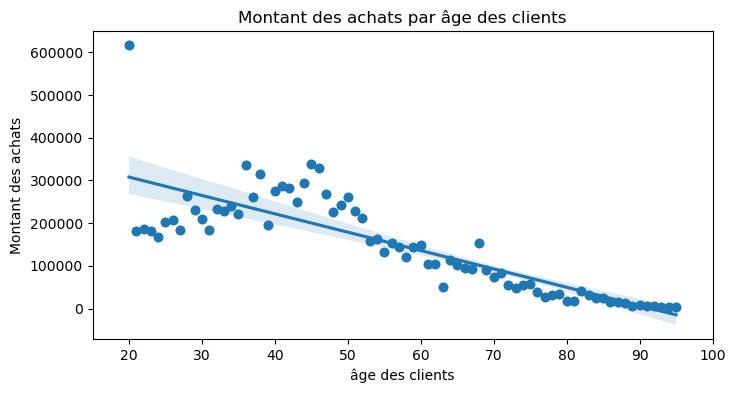

In [63]:
# Visualisation de CA en fonction d'âge des clients
plt.figure(figsize=(8, 4))
sns.regplot(x='age', y='sum', data = age_ca)
plt.scatter(age_ca['age'],age_ca['sum'])
plt.ylabel('Montant des achats')
plt.xlabel('âge des clients')
plt.title("Montant des achats par âge des clients")
plt.xlim(15,100)

Les points sont relativement dispersés autour de la droite de régression, mais suivent tout de même globalement la tendance descendante.

<div style="border: 0px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0); ">Le test Spearman</h3>
</div

Choix du test: la régression linéaire entre 2 variables quantitatives qui ne suivent pas une distribution normale.

In [64]:
# test de normalité de la distribution 

# Test de Kolmogorov-Smirnov pour X (âge des clients) par rapport à une distribution normale
ks_statistic_X, p_value_X = stats.kstest(df_final['age'], 'norm')

# Test de Kolmogorov-Smirnov pour Y (prix) par rapport à une distribution normale
ks_statistic_Y, p_value_Y = stats.kstest(df_final['price'], 'norm')

print(f"KS Statistic pour X (âge): {ks_statistic_X}, P-value: {p_value_X}")
print(f"KS Statistic pour Y (price): {ks_statistic_Y}, P-value: {p_value_Y}")

# Interprétation
alpha = 0.05
if p_value_X < alpha:
    print("La distribution de X (âge) n'est pas normale (p < 0.05)")
else:
    print("La distribution de X (âge) est normale (p >= 0.05)")

if p_value_Y < alpha:
    print("La distribution de Y (price) n'est pas normale (p < 0.05)")
else:
    print("La distribution de Y (price) est normale (p >= 0.05)")


KS Statistic pour X (âge): 1.0, P-value: 0.0
KS Statistic pour Y (price): 0.9963826616381434, P-value: 0.0
La distribution de X (âge) n'est pas normale (p < 0.05)
La distribution de Y (price) n'est pas normale (p < 0.05)


In [65]:
# Calcul du coefficient de corrélation de Spearman et de la p-value
coef, p_value = stats.spearmanr(age_ca['age'], age_ca['sum'])

print(f"Coefficient de corrélation de Spearman : {coef}")
print(f"P-value : {p_value}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("Il existe une corrélation significative entre l'âge et le montant total des achats (p < 0.05)")
else:
    print("Il n'y a pas de corrélation significative entre l'âge et le montant total des achats (p >= 0.05)")


Coefficient de corrélation de Spearman : -0.8744497607655503
P-value : 5.956077505475151e-25
Il existe une corrélation significative entre l'âge et le montant total des achats (p < 0.05)


Les résultats montrent une forte corrélation négative significative entre les deux variables analysées. Cela suggère qu’il existe une relation inversement proportionnelle forte entre elles.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3-Le lien entre l'âge des clients et la fréquence d’achat</h3>
</div

In [66]:
# Créer la dataframe avec âge et somme de CA
age_fa = df_final.groupby('age')['frequences_achats'].agg(['count', 'sum']).sort_values('sum', ascending=False).reset_index()
age_fa.head()

age  count    sum
0  36.0  25245  25245
1  45.0  25101  25101
2  46.0  24905  24905
3  38.0  23693  23693
4  44.0  22116  22116

(15.0, 100.0)

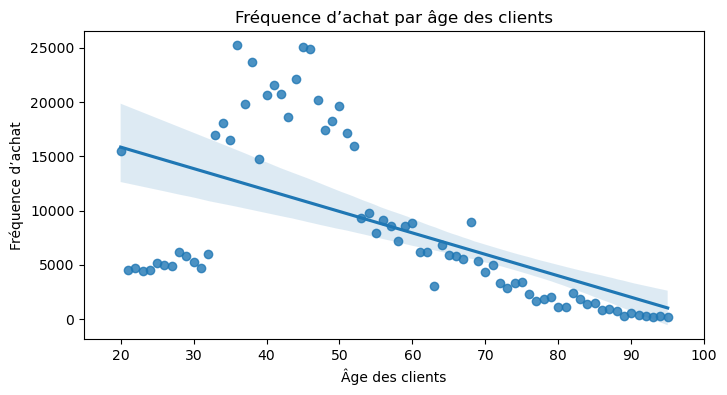

In [67]:
plt.figure(figsize=(8, 4))
sns.regplot(x='age', y='count', data = age_fa)
plt.ylabel( 'Fréquence d’achat')
plt.xlabel('Âge des clients')
plt.title("Fréquence d’achat par âge des clients")
plt.xlim(15,100)

Les jeunes clients, en particulier ceux entre 30 et 50 ans, achètent plus fréquemment que les clients plus âgés

<div style="border: 0px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0); ">Le test spearman</h3>
</div

Choix du test: 2 variables quantitatives qui ne suivent pas une distribution normale

In [68]:
# test de normalité de la distribution 

# Test de Kolmogorov-Smirnov pour X (âge des clients) par rapport à une distribution normale
ks_statistic_X, p_value_X = stats.kstest(df_final['age'], 'norm')

# Test de Kolmogorov-Smirnov pour Y (frequences_achats) par rapport à une distribution normale
ks_statistic_Y, p_value_Y = stats.kstest(df_final['frequences_achats'], 'norm')

print(f"KS Statistic pour X (âge): {ks_statistic_X}, P-value: {p_value_X}")
print(f"KS Statistic pour Y (price): {ks_statistic_Y}, P-value: {p_value_Y}")

# Interprétation
alpha = 0.05
if p_value_X < alpha:
    print("La distribution de X (âge) n'est pas normale (p < 0.05)")
else:
    print("La distribution de X (âge) est normale (p >= 0.05)")

if p_value_Y < alpha:
    print("La distribution de Y (frequences_achats) n'est pas normale (p < 0.05)")
else:
    print("La distribution de Y (frequences_achats) est normale (p >= 0.05)")

KS Statistic pour X (âge): 1.0, P-value: 0.0
KS Statistic pour Y (price): 0.8413447460685429, P-value: 0.0
La distribution de X (âge) n'est pas normale (p < 0.05)
La distribution de Y (frequences_achats) n'est pas normale (p < 0.05)


In [69]:
# Calcul du coefficient de corrélation de Spearman et de la p-value
coef, p_value = stats.spearmanr(age_fa['age'], age_fa['count'])

print(f"Coefficient de corrélation de Spearman : {coef}")
print(f"P-value : {p_value}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("Il existe une corrélation significative entre l'âge et la fréquence d'achat (p < 0.05)")
else:
    print("Il n'y a pas de corrélation significative entre l'âge et la fréquence d'achat (p >= 0.05)")

print(f"La force de la corrélation est de {abs(coef):.2f} (forte si > 0.5, modérée si entre 0.3 et 0.5, faible si < 0.3)")


Coefficient de corrélation de Spearman : -0.6756527682843472
P-value : 2.1466320003455262e-11
Il existe une corrélation significative entre l'âge et la fréquence d'achat (p < 0.05)
La force de la corrélation est de 0.68 (forte si > 0.5, modérée si entre 0.3 et 0.5, faible si < 0.3)


Il existe une relation significative entre l'âge des clients et leur fréquence d'achat, même si cette relation n'est pas linéaire.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4-Le lien entre l'âge des clients et la taille du panier moyen</h3>
</div

In [70]:
Panier_moyen_par_age = df_final.groupby(['age'], as_index=False)['price'].mean()

Panier_moyen_par_age.head(76)

age      price
0   20.0  39.776612
1   21.0  40.231772
2   22.0  39.650144
3   23.0  41.396430
4   24.0  36.959170
..   ...        ...
71  91.0  16.303065
72  92.0  16.215321
73  93.0  16.561471
74  94.0  17.862269
75  95.0  16.088317

[76 rows x 2 columns]

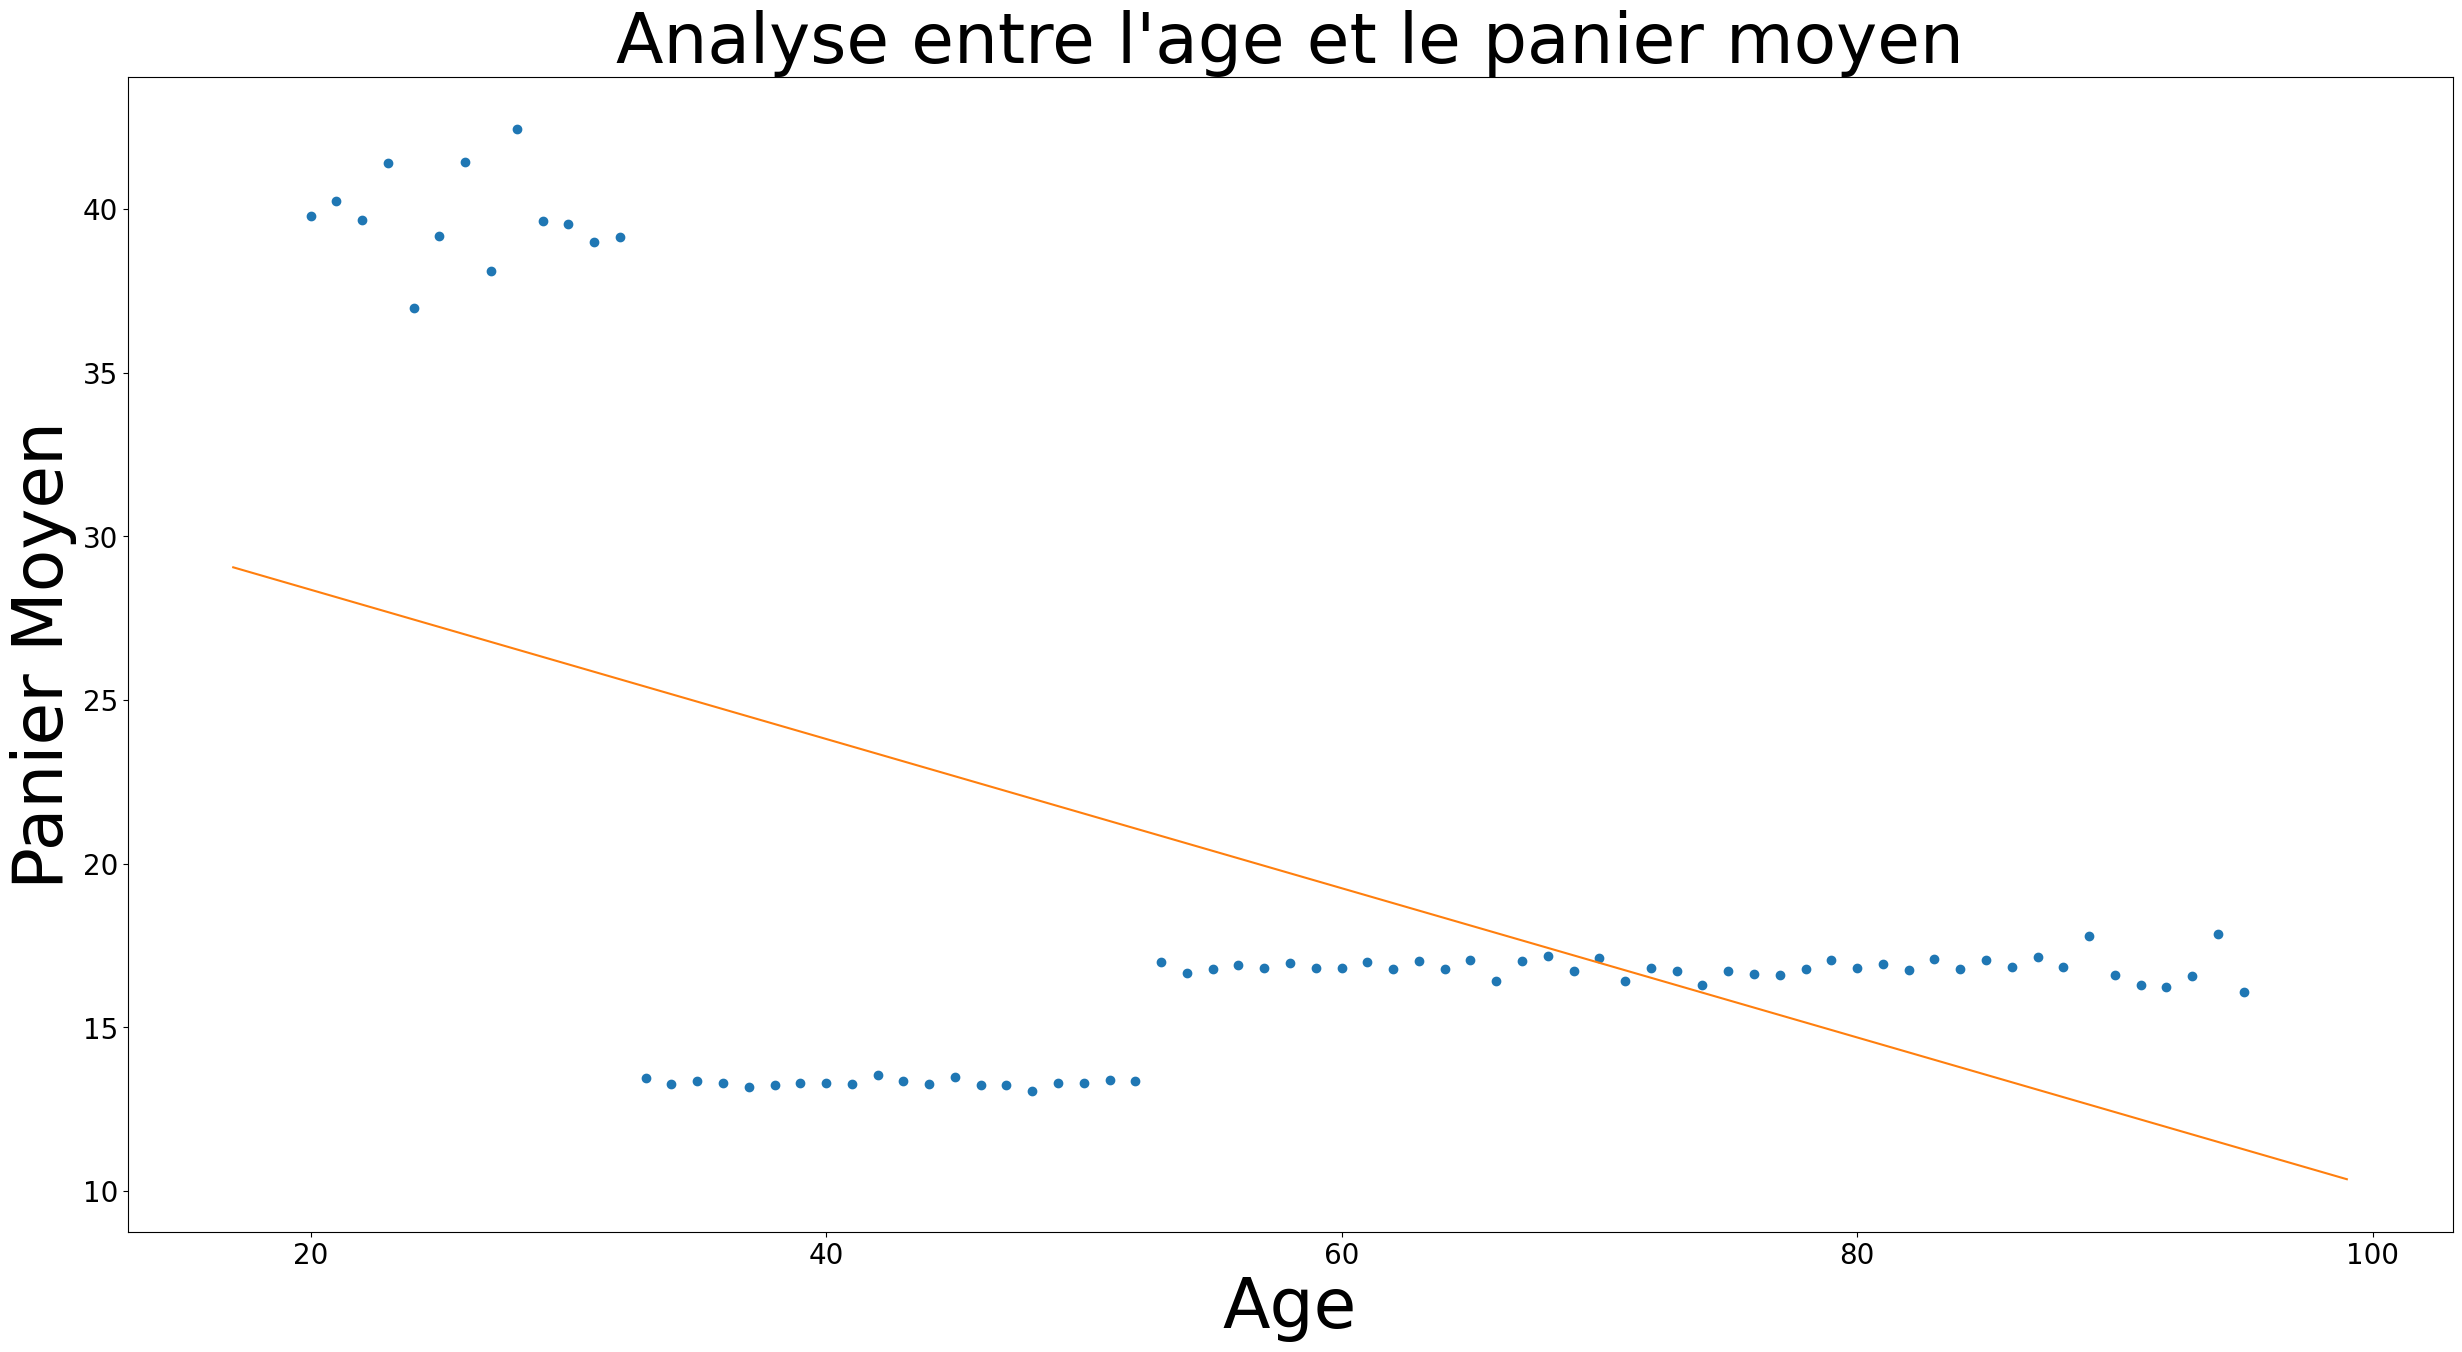

In [71]:
# un graphique représentant le panier moyen par rapport a l'âge
Panier_par_tranche_age = df_final.groupby(['age'], as_index=False)['price'].mean()
X = Panier_par_tranche_age[['age']]
Y = Panier_par_tranche_age['price']
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']
plt.figure(figsize=(30,15), dpi=100)
plt.xticks(fontsize=20)
plt.xlabel("Age",fontsize = 50)
plt.ylabel("Panier Moyen",fontsize = 50)
plt.yticks(fontsize=20)
plt.plot(Panier_par_tranche_age.age,Panier_par_tranche_age.price, "o")
plt.plot(np.arange(17,100),[a*x+b for x in np.arange(17,100)]);
plt.title("Analyse entre l'age et le panier moyen",fontsize = 50);

Les jeunes adultes (20-29 ans) semblent être des acheteurs plus actifs en termes de taille de panier, tandis que les autres groupes d'âge montrent des habitudes d'achat plus modérées.


<div style="border: 0px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0); ">Le test de spearman</h3>
</div

Choix du test: approprié pour tester la relation monotone entre l’âge des clients et la taille du panier moyen.

H0 (hypothèse nulle) :Il n'y a pas de relation monotone entre l'âge des clients et la taille du panier moyen.

H1 (hypothèse alternative) : Il existe une relation monotone entre l'âge des clients et la taille du panier moyen.

In [72]:
# Calcul du coefficient de Spearman et de la p-valeur
coef, p_value = spearmanr(Panier_moyen_par_age['age'], Panier_moyen_par_age['price'])

print("Coefficient de Spearman:", coef)
print("P-value:", p_value)

Coefficient de Spearman: -0.0777306903622693
P-value: 0.5045034885212738


La p-value de 0.51 est bien au-dessus de 0.05 ==>  il n'y a pas de relation monotone entre les deux variables analysées.
Malgré la p-value élevée, le coefficient de -0.078 suggère une très faible corrélation négative. 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5-Lien entre les  tranches d'âge des clients et la catégorie des
livres achetés</h3>
</div

In [73]:
x = 'tranche_age'
y = 'categ'
cont_age = df_final[[x, y]].pivot_table(index=x, columns=y,aggfunc=len, margins=True, margins_name='Total' )
cont_age

categ             0       1      2   Total
tranche_age                               
20_29         13365   23616  23630   60611
30_39        105507   38700   6763  150970
40_49        157479   51264    754  209497
50_59         65377   46917    743  113037
60_69         26751   35209    569   62529
70_79         12898   16900    256   30054
80_89          5145    6956    119   12220
90_99           759    1043     14    1816
Total        387281  220605  32848  640734

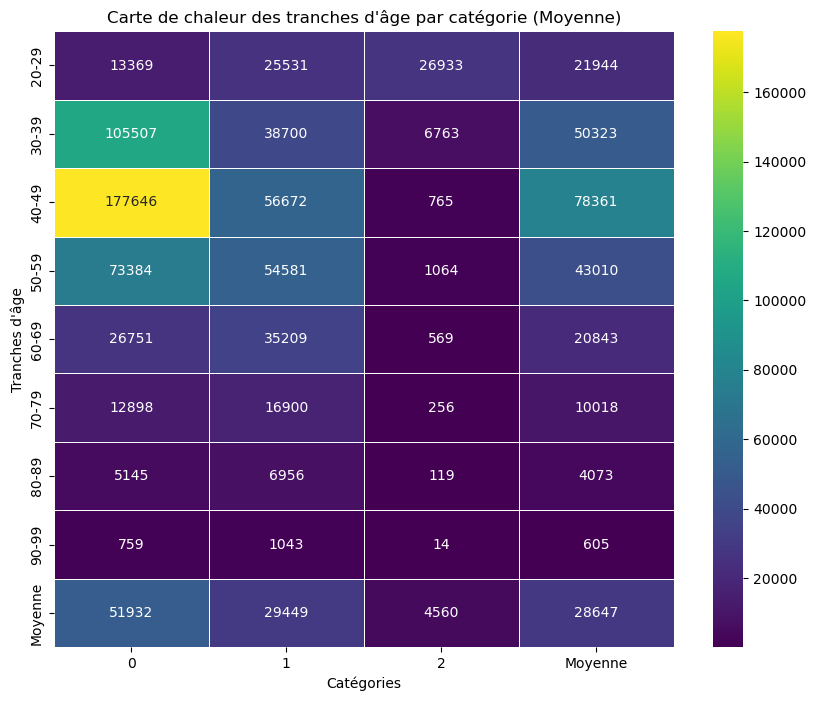

In [74]:
# Création du DataFrame avec les données
data = {
    "0": [13369, 105507, 177646, 73384, 26751, 12898, 5145, 759],
    "1": [25531, 38700, 56672, 54581, 35209, 16900, 6956, 1043],
    "2": [26933, 6763, 765, 1064, 569, 256, 119, 14]
}
index = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"]
df = pd.DataFrame(data, index=index)

# Ajouter une colonne "Moyenne" pour chaque tranche d'âge
df["Moyenne"] = df.mean(axis=1)

# Ajouter une ligne "Moyenne" pour chaque catégorie
df.loc["Moyenne"] = df.mean(axis=0)

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, fmt=".0f", cmap="viridis", cbar=True, linewidths=.5)

# Ajout d'un titre
plt.title("Carte de chaleur des tranches d'âge par catégorie (Moyenne)")
plt.xlabel("Catégories")
plt.ylabel("Tranches d'âge")

# Affichage de la heatmap
plt.show()


Ce tableau indique un volume de données d'achat de livres plus important pour les tranches d'âge 30-49 ans, particulièrement dans la catégorie 0.
Les valeurs diminuent de manière marquée dans les catégories 1 et 2, et pour les tranches d'âge au-delà de 60 ans, suggérant une possible baisse d'intérêt ou de participation dans ces segments pour ces catégories.

<div style="border: 0px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,0); ">Le Test ANOVA</h3>
</div

Choix du test: pour comparer les moyennes de plusieurs groupes en même temps. 

Hypothèse nulle (H0): Les moyennes des groupes sont toutes égales.
Cela signifie qu'il n'y a pas de différence significative entre les groupes.

Hypothèse alternative (H1): Au moins une des moyennes des groupes est différente.
Cela signifie qu'il existe au moins un groupe dont la moyenne est significativement différente des autres groupes.

In [75]:
# Séparation des données par catégorie
cat_0 = df_final[df_final['categ'] == 0]['tranche_age']
cat_1 = df_final[df_final['categ'] == 1]['tranche_age']
cat_2 = df_final[df_final['categ'] == 1]['tranche_age']

# Réalisation du test ANOVA
f_statistic, p_value = stats.f_oneway(cat_0, cat_1, cat_2)

print(f"Statistique F : {f_statistic}")
print(f"Valeur p : {p_value}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("Il existe des différences significatives entre les tranches d'âge pour les différentes catégories de livres (p < 0.05)")
else:
    print("Il n'y a pas de différences significatives entre les tranches d'âge pour les différentes catégories de livres (p >= 0.05)")

Statistique F : 8055.349824729596
Valeur p : 0.0
Il existe des différences significatives entre les tranches d'âge pour les différentes catégories de livres (p < 0.05)


Les groupes comparés présentent des différences significatives, et que ces différences ne sont pas dues au hasard.